<a href="https://colab.research.google.com/github/CometSplit/DS2500/blob/main/Class_05_EDA_with_House_Expenditures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS 2500 – Class 05: Exploratory Data Analysis

Prof. Marina Kogan

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

import numpy as np
import pandas as pd

# 1. Formulate your questions

Are there party-level differences in House expenditures?

# 2. Read in your data

From ProPublica's [House Office Expenditure Data](https://projects.propublica.org/represent/expenditures).

In [ ]:
#!curl -L "'https://www.dropbox.com/s/t6vnynq7nccv832/2020Q3-house-disburse-detail.csv?dl=0" > '2020Q3-house-disburse-detail.csv'
df = pd.read_csv('https://www.dropbox.com/scl/fi/03yatuk1m62wgf6p2f81w/2022Q3-house-disburse-detail.csv?rlkey=lvezbselm10emo2bxhd6rxv58&dl=1')

# 3. Check the packaging

In [ ]:
df.shape

(128487, 15)

# 4. Look at the top and bottom of data

In [ ]:
df.head()

,BIOGUIDE_ID,OFFICE,QUARTER,PROGRAM,CATEGORY,SORT SEQUENCE,DATE,TRANSCODE,RECORDID,PAYEE,START DATE,END DATE,PURPOSE,AMOUNT,YEAR
0,NaN,2022 OFFICE OF THE SPEAKER,3,OFFICIAL EXPENSES - LEADERSHIP,SUPPLIES AND MATERIALS,DETAIL,2022-08-22,AP,1590367,OCCASIONS CATERERS,2022-07-02,2022-07-02,FOOD & BEVERAGE,2925.0,2022
1,NaN,2022 OFFICE OF THE SPEAKER,3,OFFICIAL EXPENSES - LEADERSHIP,SUPPLIES AND MATERIALS,DETAIL,2022-08-23,AP,1590369,OCCASIONS CATERERS,2022-07-14,2022-07-14,FOOD & BEVERAGE,10595.0,2022
2,NaN,2022 OFFICE OF THE SPEAKER,3,OFFICIAL EXPENSES - LEADERSHIP,SUPPLIES AND MATERIALS,DETAIL,2022-08-24,AP,1590373,OCCASIONS CATERERS,2022-07-19,2022-07-19,FOOD & BEVERAGE,8676.7,2022
3,NaN,2022 OFFICE OF THE SPEAKER,3,OFFICIAL EXPENSES - LEADERSHIP,SUPPLIES AND MATERIALS,SUBTOTAL,,,,,,,SUPPLIES AND MATERIALS TOTALS:,22196.7,2022
4,NaN,2022 OFFICE OF THE SPEAKER,3,OFFICIAL EXPENSES - LEADERSHIP,SUPPLIES AND MATERIALS,SUBTOTAL,,,,,,,OFFICIAL EXPENSES - LEADERSHIP TOTALS:,22196.7,2022


In [ ]:
df.tail()

,BIOGUIDE_ID,OFFICE,QUARTER,PROGRAM,CATEGORY,SORT SEQUENCE,DATE,TRANSCODE,RECORDID,PAYEE,START DATE,END DATE,PURPOSE,AMOUNT,YEAR
128482,NaN,2022 PAYROLL CONTRIBUTIONS/DEDUCTS,3,NAFI RETIREMENT,PERSONNEL BENEFITS,DETAIL,2022-07-29,GL,PAY0117169,,2022-07-01,2022-07-31,NAFI,1073.13,2022
128483,NaN,2022 PAYROLL CONTRIBUTIONS/DEDUCTS,3,NAFI RETIREMENT,PERSONNEL BENEFITS,DETAIL,2022-08-23,GL,PAD0117695,,2022-07-01,2022-07-31,NAFI,-1073.13,2022
128484,NaN,2022 PAYROLL CONTRIBUTIONS/DEDUCTS,3,NAFI RETIREMENT,PERSONNEL BENEFITS,SUBTOTAL,,,,,,,PERSONNEL BENEFITS TOTALS:,0.00,2022
128485,NaN,2022 PAYROLL CONTRIBUTIONS/DEDUCTS,3,NAFI RETIREMENT,PERSONNEL BENEFITS,SUBTOTAL,,,,,,,NAFI RETIREMENT TOTALS:,0.00,2022
128486,NaN,2022 PAYROLL CONTRIBUTIONS/DEDUCTS,3,NAFI RETIREMENT,PERSONNEL BENEFITS,GRAND TOTAL FOR ORGANIZATION,,,,,,,OFFICE TOTALS:,0.00,2022


# 5. Check the "n"s

There should only be Q3 data in here.

In [ ]:
df['QUARTER'].value_counts()

3    128487
Name: QUARTER, dtype: int64

There should only be 2022 data in here.

In [ ]:
df['YEAR'].value_counts()

2022    128487
Name: YEAR, dtype: int64

There should be around 435 members of Congress.

In [ ]:
len(set(df['BIOGUIDE_ID'].values))

451

**What is a different way to get this result?** Without the set notation?

451

**Take a poll** [here](https://PollEv.com/marinakogan791)

# 6. Validate against an external data source




What are some of the most common purposes?

In [ ]:
df['PURPOSE'].value_counts().head(20)

PRIVATE AUTO MILEAGE              14526
AIRFARE COMMERCIAL TRANSPORT       8572
UTILITIES                          6531
MEALS                              6470
OFFICE SUPPLIES (OUTSIDE)          6023
STUDENT LOANS                      4830
TAXI/RIDE SHARE                    4674
LODGING                            3273
FOOD & BEVERAGE                    3143
PUBLICATIONS/REFERENCE MAT'L       3141
POSTAGE / COURIER / BOX RENTAL     2564
OFFICE SUPPLY (TRANSFER)           2542
DISTRICT OFFICE RENT (PRIVATE)     2424
WATER                              2350
FRANKED MAIL                       2076
MAINTENANCE / REPAIRS              2046
ADVERTISEMENTS                     1961
PAID INTERN - HOUSE PROGRAM        1912
TECHNOLOGY SERVICE CONTRACTS       1822
NON-FRANKABLE PRINTING & REPRO     1800
Name: PURPOSE, dtype: int64

In [ ]:
df['AMOUNT']=df['AMOUNT                                                                                                                                           ']

Student loans, that looks interesting.

In [ ]:
student_loans_df = df[df['PURPOSE'] == "STUDENT LOANS"]
len(student_loans_df)

4830

Before we used square brackets to select rows, where a numeric column was above a threshold (1965). Here, we are selecting a category from a categorical column.

Congress spent a total of $3.4 million on student loan payments in 2022Q3.

In [ ]:
'${:,.2f}'.format(student_loans_df['AMOUNT'].sum())

'$3,404,755.13'

The format() method formats the specified value and inserts it inside the string's placeholder. The placeholder is defined using curly brackets: {}.

Is the distribution of payments typical? Mostly.

In [ ]:
student_loans_df['AMOUNT'].describe()

count    4830.000000
mean      704.918246
std       209.313213
min         0.050000
25%       600.000000
50%       833.000000
75%       833.000000
max       833.000000
Name: AMOUNT, dtype: float64

# 7. Make a plot

<Axes: >

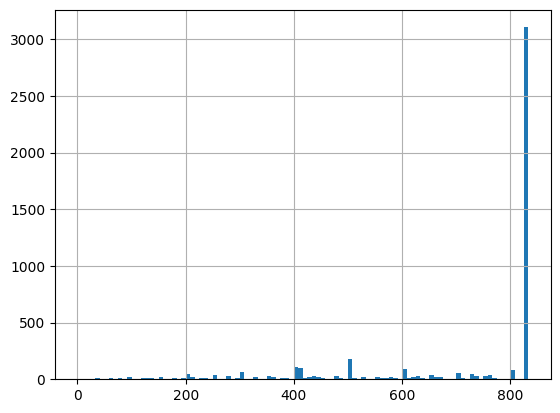

In [ ]:
student_loans_df['AMOUNT'].hist(bins=100)

**Take a poll** [here](https://PollEv.com/marinakogan791)

# 8. Try an easy solution

Load data on the 117th Congress from [CivilServiceUSA](https://github.com/CivilServiceUSA/us-house), which include party data (as well as a bunch of other valuable information).

In [ ]:
house_df = pd.read_csv('https://www.dropbox.com/scl/fi/divf9bpgx89us4g0auukr/us-house.csv?rlkey=vvtkqyjh0z4d4bnhak0yt43q3&dl=1')
house_df.head()

,state_name,state_name_slug,state_code,state_code_slug,district,at_large,vacant,bioguide,thomas,opensecrets,...,address_city,address_state,address_zipcode,address_type,website,contact_page,facebook_url,twitter_handle,twitter_url,photo_url
0,Alaska,alaska,AK,ak,NaN,True,False,Y000033,1256.0,N00007999,...,Washington,DC,20515,NaN,https://donyoung.house.gov,https://donyoung.house.gov/contact,https://facebook.com/RepDonYoung,repdonyoung,https://twitter.com/repdonyoung,https://cdn.civil.services/us-house/headshots/...
1,Alabama,alabama,AL,al,1.0,False,False,C001054,NaN,NaN,...,House Office Building Washington,DC,20515,NaN,https://carl.house.gov,https://carl.house.gov/contact,https://facebook.com/RepJerryCarl,RepJerryCarl,https://twitter.com/RepJerryCarl,https://cdn.civil.services/us-house/headshots/...
2,Alabama,alabama,AL,al,2.0,False,False,M001212,NaN,NaN,...,House Office Building Washington,DC,20515,NaN,https://barrymoore.house.gov,https://barrymoore.house.gov/contact,https://facebook.com/RepBarryMoore,RepBarryMoore,https://twitter.com/RepBarryMoore,https://cdn.civil.services/us-house/headshots/...
3,Alabama,alabama,AL,al,3.0,False,False,R000575,1704.0,N00024759,...,Washington,DC,20515,NaN,https://mikerogers.house.gov,https://mikerogers.house.gov/contact-mike/emai...,https://facebook.com/MikeRogersforCongress,RepMikeRogersAL,https://twitter.com/RepMikeRogersAL,https://cdn.civil.services/us-house/headshots/...
4,Alabama,alabama,AL,al,4.0,False,False,A000055,1460.0,N00003028,...,Washington,DC,20515,NaN,https://aderholt.house.gov,https://aderholt.house.gov/contact-robert,https://facebook.com/RobertAderholt,Robert_Aderholt,https://twitter.com/Robert_Aderholt,https://cdn.civil.services/us-house/headshots/...


Join the `house_df` party data into the `df` expenditure data.

In [ ]:
_df1 = df.dropna(subset=['BIOGUIDE_ID'])
_df2 = house_df[['bioguide','party','gender']]
joined_df = pd.merge(_df1,_df2,left_on='BIOGUIDE_ID',right_on='bioguide',how='inner')
joined_df.head(1)

,BIOGUIDE_ID,OFFICE,QUARTER,PROGRAM,CATEGORY,SORT SEQUENCE,DATE,TRANSCODE,RECORDID,PAYEE,START DATE,END DATE,PURPOSE,AMOUNT,YEAR,AMOUNT,bioguide,party,gender
0,A000370,2022 HON. ALMA S. ADAMS,3,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2022-07-28,AP,1583569,UNITED STATES POSTAL SERVICE,2022-06-01,2022-06-30,FRANKED MAIL,68.1,2022,68.1,A000370,democrat,female


Count up how much each member spent, preserving their party and gender information.

In [ ]:
agg_d = {'AMOUNT':np.sum,
         'party':'first',
         'gender':'first'
        }

joined_agg_df = joined_df.groupby('BIOGUIDE_ID').agg(agg_d)
joined_agg_df.head()

,AMOUNT,party,gender
BIOGUIDE_ID,,,
A000055,1924739.00,republican,male
A000148,1928701.84,democrat,male
A000369,1130705.04,republican,male
A000370,1451035.96,democrat,female
A000371,2586878.28,democrat,male


In [ ]:
pd.pivot_table(joined_agg_df,
               values='AMOUNT',
               columns='party',
               aggfunc='mean').style.format('${:,.0f}')

party,democrat,republican
AMOUNT,"$1,690,121","$1,599,334"


In [ ]:
pd.pivot_table(joined_agg_df,
               values='AMOUNT',
               columns='gender',
               aggfunc='mean').style.format('${:,.0f}')

gender,female,male
AMOUNT,"$1,690,374","$1,629,700"


Are these differences statistically significant?

In [ ]:
from scipy import stats

r_amount = joined_agg_df.loc[joined_agg_df['party'] == 'republican','AMOUNT']
d_amount = joined_agg_df.loc[joined_agg_df['party'] == 'democrat','AMOUNT']
stats.ttest_ind(r_amount,d_amount)

TtestResult(statistic=-3.069626472107167, pvalue=0.0022823037547627613, df=420.0)

In [ ]:
m_amount = joined_agg_df.loc[joined_agg_df['gender'] == 'male','AMOUNT']
f_amount = joined_agg_df.loc[joined_agg_df['gender'] == 'female','AMOUNT']
stats.ttest_ind(m_amount,f_amount)

TtestResult(statistic=-1.7990551650743878, pvalue=0.07272769225457103, df=420.0)

If you don't know these statistical tests, how could use plots to visually answer our question (Are there party-level differences in House expenditures?)